In [1]:
import numpy as np
import pandas as pd
import os
import re
import sys
sys.path.append(os.path.realpath("../src"))
import analysis

import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import rc
plt.style.use('classic')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('figure', facecolor='w')
rc('xtick', labelsize=20)
rc('ytick', labelsize=20)

In [2]:
def get_table_s1(config_id):
    
    synth = analysis.SyntheticModel(f"../analysis/config/config_{config_id}.yaml", verbose=False, compute_true=False)
    samp = np.load(f"../analysis/results_sensitivity/config_{config_id}/var_global_sensitivity_sample.npz")
    synth.variance_global_sensitivity(param_values=samp['param_values'], Y=samp['Y'])
    
    age = synth.inparams_all.dict_true['vpl.dStopTime']
    
    return age, synth.table_s1


def get_tables_sorted(config_id_list):
    
    ages = []
    tables = []
    for cid in config_id_list:
        age, tab = get_table_s1(cid)
        ages.append(age)
        tables.append(tab)

    # sens_params = synth.outparams.names
    sens_params = ["final.primary.RotPer", 
                   "final.secondary.OrbPeriod",
                   "final.secondary.Eccentricity"]
        
    synth = analysis.SyntheticModel(f"../analysis/config/config_{config_id_list[0]}.yaml", verbose=False, compute_true=False)
    tsort = dict(zip(sens_params, [{} for ii in range(synth.outparams.num)]))

    for ii, tab in enumerate(tables):
        for key in tsort:
            tsort[key][str(int(ages[ii]))] = tab[key]
        
    inlabels = synth.inparams_var.labels
    outlabels = [synth.outparams.dict_labels[par] for par in sens_params]
    
    return tsort, inlabels, outlabels


def plot_tables_sorted(tsort, inlabels, outlabels, model="", save=False, show=True, cmap="bone"):
    
    for key in tsort.keys():
        df = pd.DataFrame(data=tsort[key])
        
        sn.heatmap(df, yticklabels=inlabels, annot=True, annot_kws={"size": 16}, vmin=0, vmax=1, cmap=cmap)
        plt.title(outlabels[ii] + " sensitivity", fontsize=22)
        plt.yticks(rotation=0)
        plt.xlabel("Age [Myr]", fontsize=22)
        plt.ylabel("Initial Conditions", fontsize=22)
        if save == True:
            plt.savefig(f"../draft/figures/sensitivity_{model}_{key.replace('.', '_')}.png", bbox_inches="tight")
        if show == True:
            plt.show()
        plt.close()
        

def plot_tables_sorted_combined(tsort, inlabels, outlabels, model="", save=False, show=True, cmap="bone", 
                                title=True, xlabel=True, figsize=[20,6]):
    
    fig, axs = plt.subplots(1, 3, figsize=figsize, sharey=True)
    plt.subplots_adjust(wspace=.01)

    for ii, key in enumerate(tsort.keys()):
        df = pd.DataFrame(data=tsort[key])
        if xlabel == True:
            sn.heatmap(df, yticklabels=inlabels, annot=True, annot_kws={"size": 14}, cbar=False, ax=axs[ii], vmin=0, vmax=1, cmap=cmap)
        else:
            sn.heatmap(df, yticklabels=inlabels, xticklabels=False, annot=True, annot_kws={"size": 14}, cbar=False, ax=axs[ii], vmin=0, vmax=1, cmap=cmap)
        if title == True:
            axs[ii].set_title(outlabels[ii] + " sensitivity", fontsize=20)
    
    if xlabel == True:
        axs[1].set_xlabel("Age [Myr]", fontsize=20)
    axs[0].set_ylabel(model.upper()[0:3] + "  init conditions", fontsize=20)
    axs[0].tick_params(labelrotation=0)

    if save == True:
        plt.savefig(f"../draft/figures/sensitivity_{model}.png", bbox_inches="tight")
    if show == True:
        plt.show()
    plt.close()

In [3]:
ctl = ["050", "051", "052", "053", "054", "055", "056"]
cpl = ["057", "058", "059", "060", "061", "062", "063"]
ctl_reduced = ["064", "065", "066", "067", "068", "069", "070"]
cpl_reduced = ["071", "072", "073", "074", "075", "076", "077"]
ctl_stellar = ["078", "079", "080", "081", "082", "083", "084"]
cpl_stellar = ["085", "086", "087", "088", "089", "090", "091"]
ctl_stellar_reduced = ["092", "093", "094", "095", "096", "097", "098"]
cpl_stellar_reduced = ["099", "100", "101", "102", "103", "104", "105"]

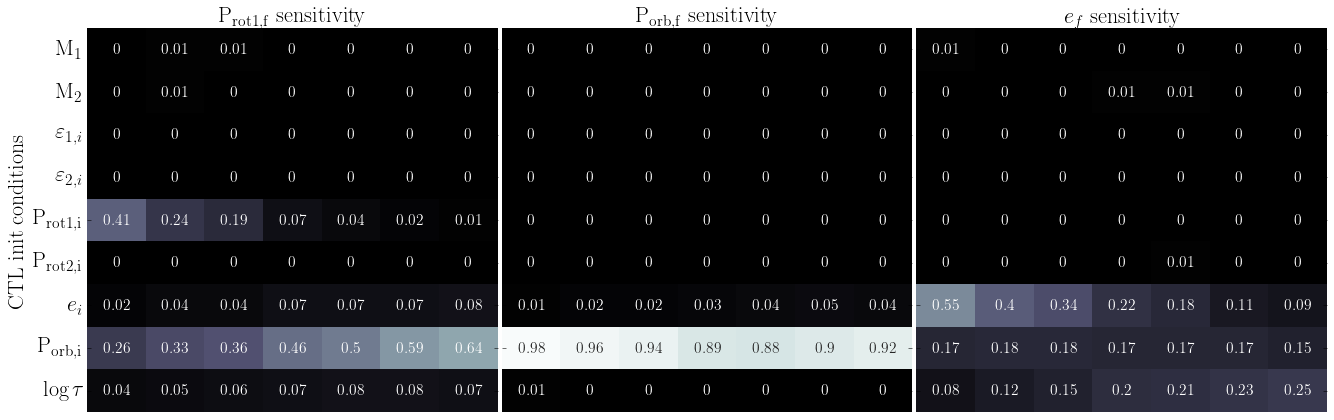

In [4]:
tsort, inlabels, outlabels = get_tables_sorted(ctl)
inlabels = [re.sub("[\(\[].*?[\)\]]", "", lbl).strip("]") for lbl in inlabels]
outlabels = [re.sub("[\(\[].*?[\)\]]", "", lbl).strip("]") for lbl in outlabels]
plot_tables_sorted_combined(tsort, inlabels, outlabels, model="ctl", save=True, xlabel=False)

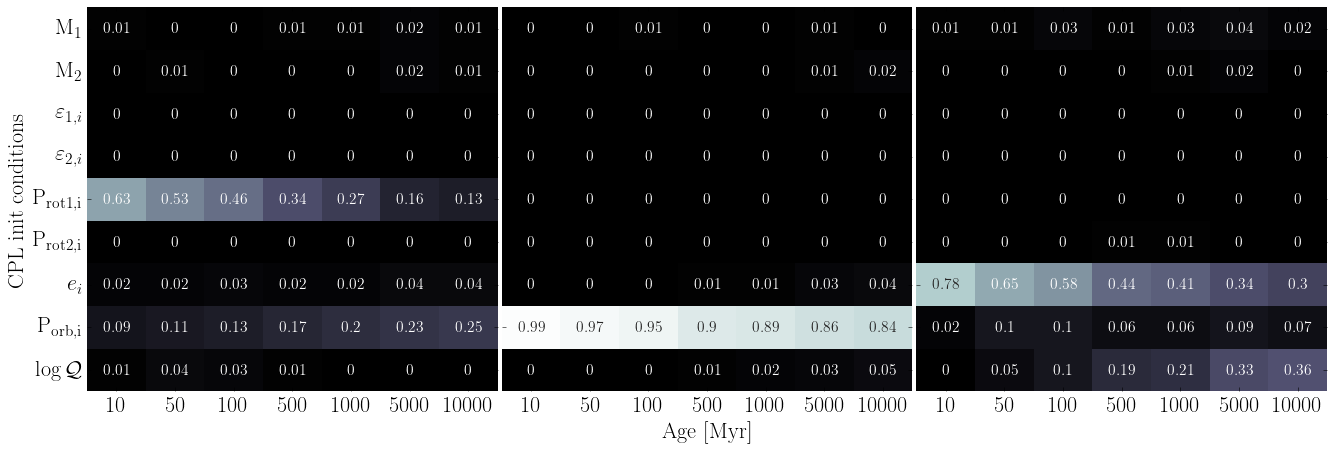

In [5]:
tsort, inlabels, outlabels = get_tables_sorted(cpl)
inlabels = [re.sub("[\(\[].*?[\)\]]", "", lbl).strip("]") for lbl in inlabels]
outlabels = [re.sub("[\(\[].*?[\)\]]", "", lbl).strip("]") for lbl in outlabels]
plot_tables_sorted_combined(tsort, inlabels, outlabels, model="cpl", save=True, title=False)

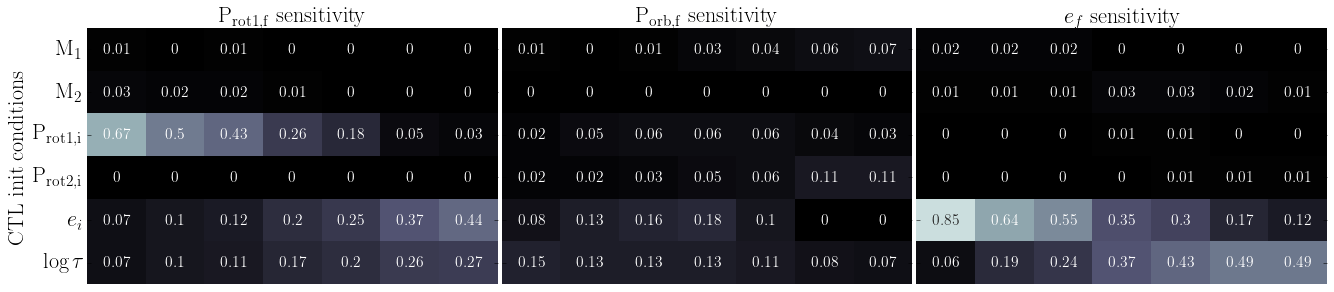

In [6]:
tsort, inlabels, outlabels = get_tables_sorted(ctl_reduced)
inlabels = [re.sub("[\(\[].*?[\)\]]", "", lbl).strip("]") for lbl in inlabels]
outlabels = [re.sub("[\(\[].*?[\)\]]", "", lbl).strip("]") for lbl in outlabels]
plot_tables_sorted_combined(tsort, inlabels, outlabels, model="ctl_reduced", save=True, xlabel=False, figsize=[20,4])

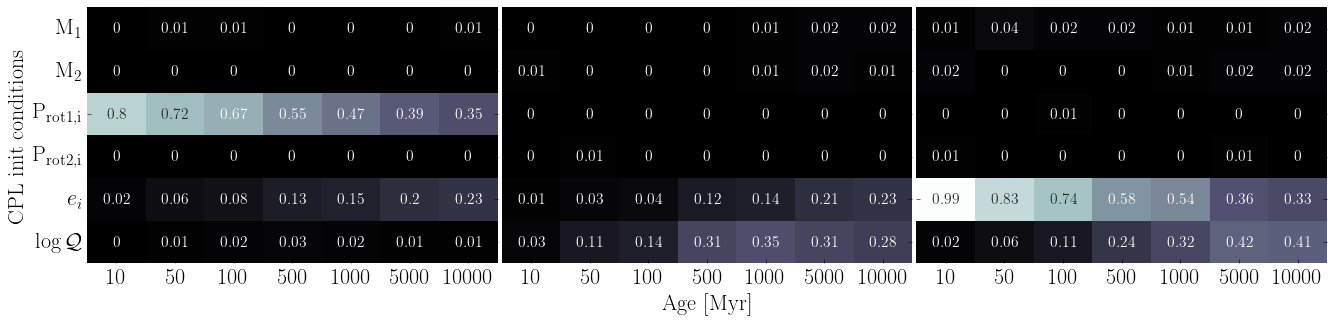

In [7]:
tsort, inlabels, outlabels = get_tables_sorted(cpl_reduced)
inlabels = [re.sub("[\(\[].*?[\)\]]", "", lbl) for lbl in inlabels]
outlabels = [re.sub("[\(\[].*?[\)\]]", "", lbl) for lbl in outlabels]
plot_tables_sorted_combined(tsort, inlabels, outlabels, model="cpl_reduced", save=True, title=False, figsize=[20,4])

fix_tide: True, fix_porb: False, fix_radius: False
fix_tide: True, fix_porb: False, fix_radius: False
fix_tide: True, fix_porb: False, fix_radius: False
fix_tide: True, fix_porb: False, fix_radius: False
fix_tide: True, fix_porb: False, fix_radius: False
fix_tide: True, fix_porb: False, fix_radius: False
fix_tide: True, fix_porb: False, fix_radius: False


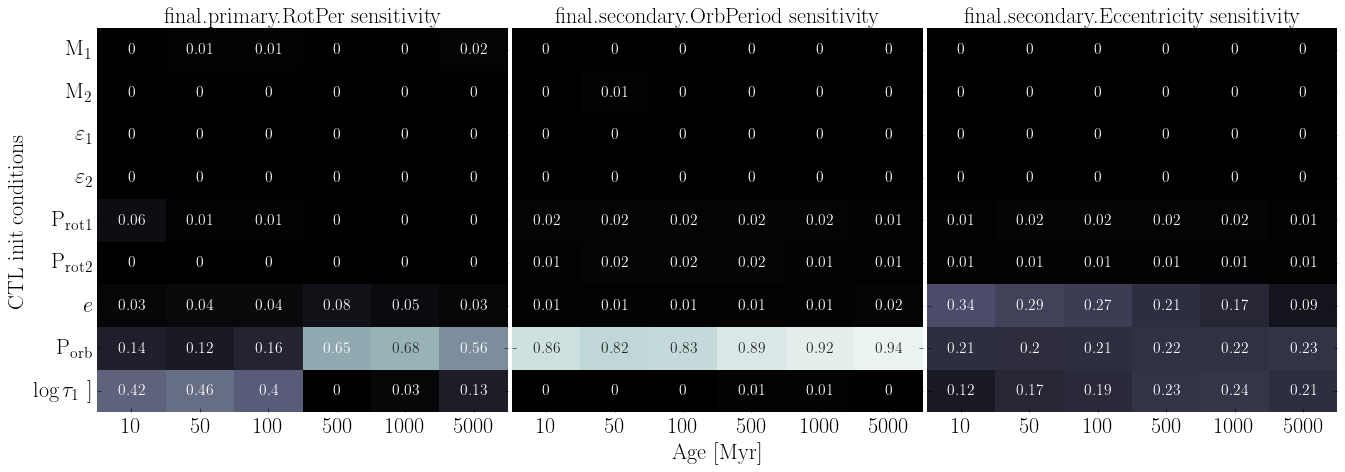

In [4]:
tsort, inlabels, outlabels = get_tables_sorted(ctl_stellar)
inlabels = [re.sub("[\(\[].*?[\)\]]", "", lbl) for lbl in inlabels]
outlabels = [re.sub("[\(\[].*?[\)\]]", "", lbl) for lbl in outlabels]
plot_tables_sorted_combined(tsort, inlabels, outlabels, model="ctl_stellar", save=True)

In [ ]:
tsort, inlabels, outlabels = get_tables_sorted(cpl_stellar)
inlabels = [re.sub("[\(\[].*?[\)\]]", "", lbl) for lbl in inlabels]
outlabels = [re.sub("[\(\[].*?[\)\]]", "", lbl) for lbl in outlabels]
plot_tables_sorted_combined(tsort, inlabels, outlabels, model="cpl_stellar", save=True)

In [ ]:
tsort, inlabels, outlabels = get_tables_sorted(ctl_stellar_reduced)
inlabels = [re.sub("[\(\[].*?[\)\]]", "", lbl) for lbl in inlabels]
outlabels = [re.sub("[\(\[].*?[\)\]]", "", lbl) for lbl in outlabels]
plot_tables_sorted_combined(tsort, inlabels, outlabels, model="ctl_stellar_reduced", save=True)

In [ ]:
tsort, inlabels, outlabels = get_tables_sorted(cpl_stellar_reduced)
inlabels = [re.sub("[\(\[].*?[\)\]]", "", lbl) for lbl in inlabels]
outlabels = [re.sub("[\(\[].*?[\)\]]", "", lbl) for lbl in outlabels]
plot_tables_sorted_combined(tsort, inlabels, outlabels, model="cpl_stellar_reduced", save=True)

In [10]:
ages = []
tables = []
prot1 = []
prot2 = []
ecc = []
porb = []

sims = ctl 

for cid in sims:
    age, tab = get_table_s1(cid)
    ages.append(age)
    tables.append(tab)
    prot1.append(tab['final.primary.RotPer'].values)
    prot2.append(tab['final.secondary.RotPer'].values)
    ecc.append(tab['final.secondary.Eccentricity'].values)
    porb.append(tab['final.secondary.OrbPeriod'].values)
    
synth = analysis.SyntheticModel(f"../analysis/config/config_{sims[0]}.yaml", verbose=False, compute_true=False)

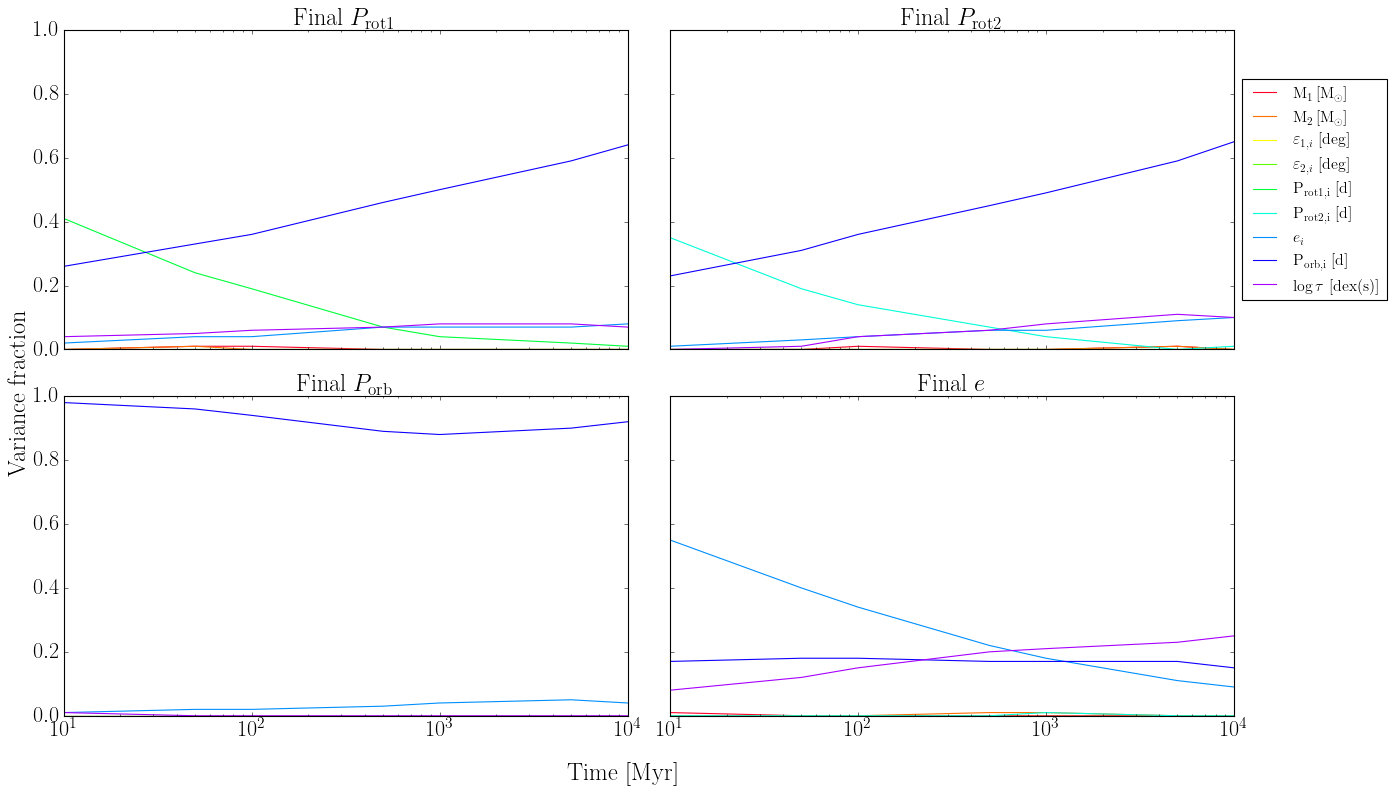

In [16]:
fig, axs = plt.subplots(2, 2, figsize=[16,10], sharex=True, sharey=True)

NUM_COLORS = np.array(prot1).shape[1]
cm = plt.get_cmap('gist_rainbow')
colors = color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

for ii, invar in enumerate(np.array(prot1).T):
    axs[0][0].plot(ages, invar, color=colors[ii])

for ii, invar in enumerate(np.array(prot2).T):
    axs[0][1].plot(ages, invar, label=synth.inparams_var.labels[ii], color=colors[ii])
    
for ii, invar in enumerate(np.array(porb).T):
    axs[1][0].plot(ages, invar, color=colors[ii])
    
for ii, invar in enumerate(np.array(ecc).T):
    axs[1][1].plot(ages, invar, color=colors[ii])
    
axs[0][0].set_title(r"Final $P_{\rm rot 1}$", fontsize=22)
axs[0][1].set_title(r"Final $P_{\rm rot 2}$", fontsize=22)
axs[1][0].set_title(r"Final $P_{\rm orb}$", fontsize=22)
axs[1][1].set_title(r"Final $e$", fontsize=22)
    
fig.supylabel("Variance fraction", fontsize=22)
fig.supxlabel("Time [Myr]", fontsize=22, ha='center')
plt.xscale('log')
plt.xlim(min(ages), max(ages))
# plt.legend(loc='best')
plt.tight_layout()
axs[0][1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()